#### Import libraries 


In [1]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#### Function to superimpose text on image 


In [2]:
def display_cover(top,bottom ):
    """This function
    """
    import requests
    
    name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) #25pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

In [3]:
import requests

The URL to the random Wikipedia page:

In [4]:
wiki_link='https://en.wikipedia.org/wiki/Special:Random'

 Convert the page to a string:

In [5]:
random_wikipedia_page=requests.get(wiki_link)

 Extract the XML as a text file a string:

In [6]:
page=str(random_wikipedia_page.text)
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Lectionary 126 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Lectionary_126","wgTitle":"Lectionary 126","wgCurRevisionId":734840973,"wgRevisionId":734840973,"wgArticleId":23136605,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Greek New Testament lectionaries","11th-century biblical manuscripts","Manuscripts of the Vatican Library"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","Februa

 Use the title of the Wikipedia article as the title of the band:

In [7]:
start=page.find('<title>')
print(start)
end=page.find('</title>')
print(end)
title_raw=page[start+len('<title>'):end]
print(title_raw)

94
127
Lectionary 126 - Wikipedia


Remove the term Wikipedia from the title:

In [8]:
band_title=title_raw.replace(" - Wikipedia","")
print(band_title)

Lectionary 126


 Extract the title of a second Wikipedia article and use the result to album_title:

In [9]:
wikipedia_link1='https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page1=requests.get(wikipedia_link1)
page1=str(raw_random_wikipedia_page1.text)
print(page1)
start1=page1.find('<title>')
print(start1)
end1=page1.find('</title>')
print(end1)
title_raw1=page1[start1+len('<title>'):end1]
print(title_raw1)
album_title=title_raw1.replace(" - Wikipedia","")
print(album_title)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Channel 12 low-power TV stations in the United States - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Channel_12_low-power_TV_stations_in_the_United_States","wgTitle":"Channel 12 low-power TV stations in the United States","wgCurRevisionId":877183160,"wgRevisionId":877183160,"wgArticleId":45498350,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["American TV stations by channel number"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDate

In [10]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Lectionary 126
Your album:  Channel 12 low-power TV stations in the United States


Display the fake album cover:

In [11]:
album_cover=display_cover(top=band_title,bottom=album_title)

In [12]:
album_cover.save('sample-out.png')

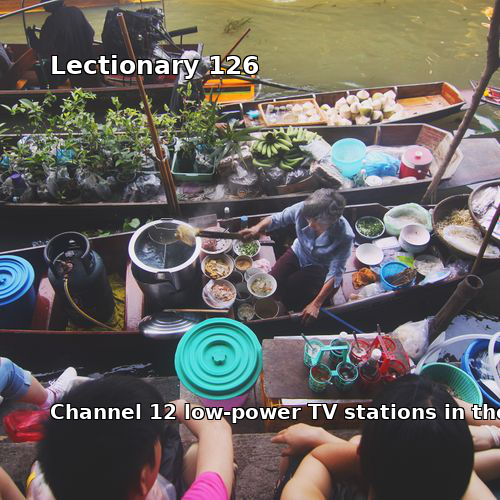

In [13]:
IPythonImage(filename='sample-out.png')

### About the Authors:  
 [James Reeve]( https://www.linkedin.com/in/reevejamesd/) James Reeves is a Software Engineering intern at IBM.



 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.
 

 <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).